In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

##Dataset Info:

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Link:https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols=["fLenght","fWidht","fSize","sCoc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
dp=pd.read_csv("magic04.data",names=cols)
dp.head()

,fLenght,fWidht,fSize,sCoc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


change to 0 and 1 int type array

In [3]:
dp["class"]=(dp["class"]=="g").astype(int)

In [4]:
dp.head()


,fLenght,fWidht,fSize,sCoc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


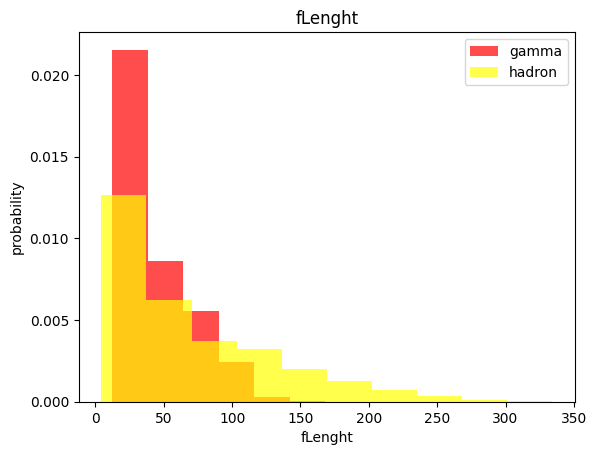

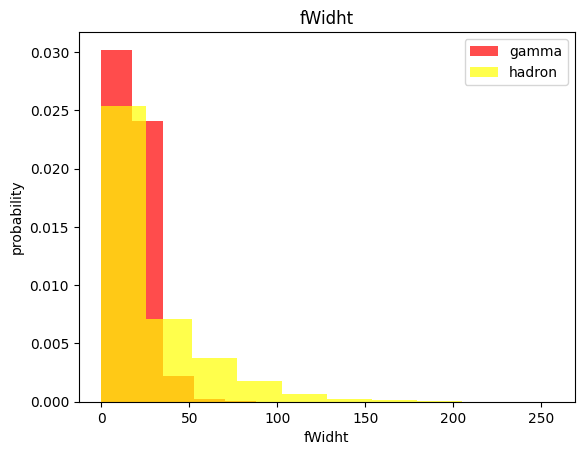

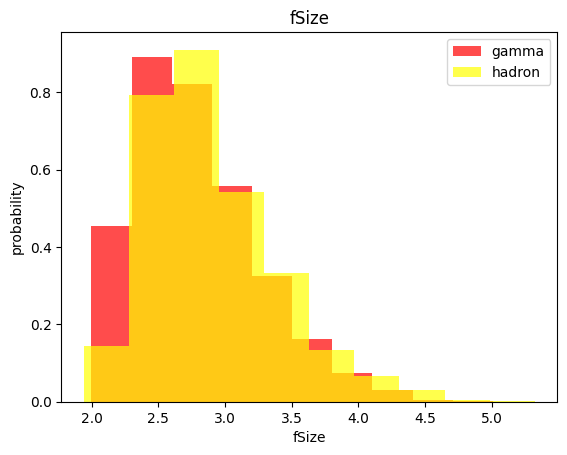

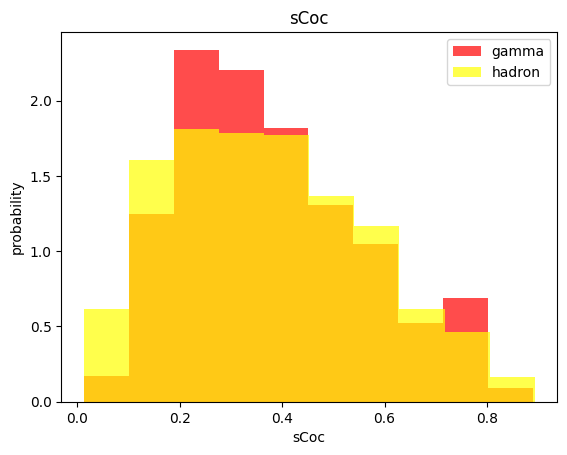

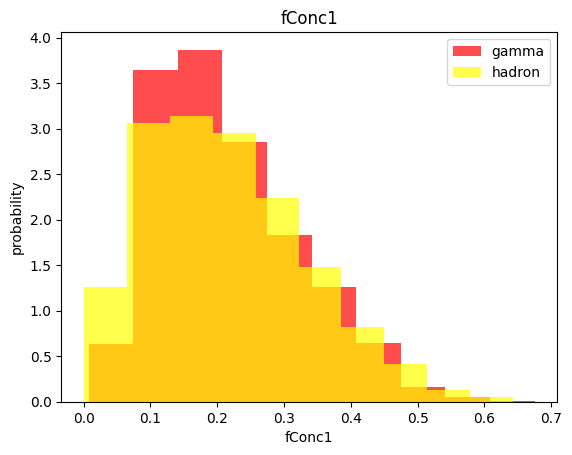

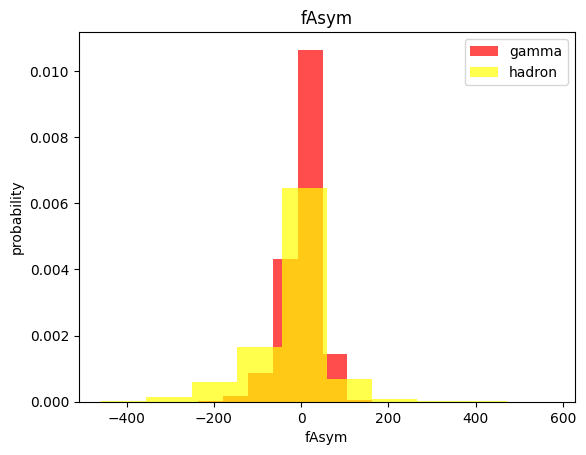

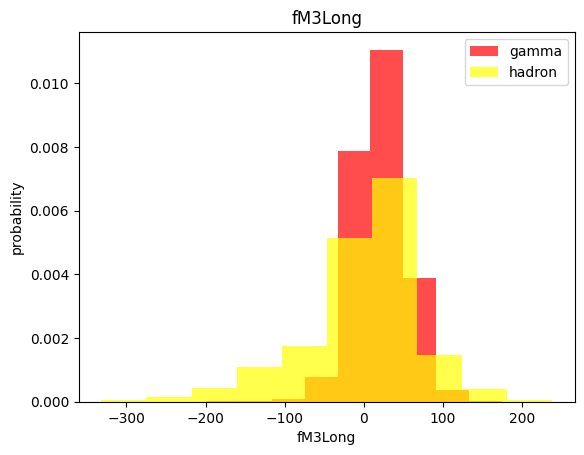

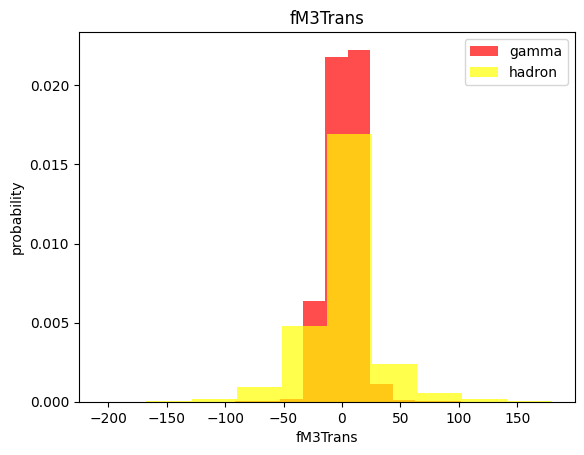

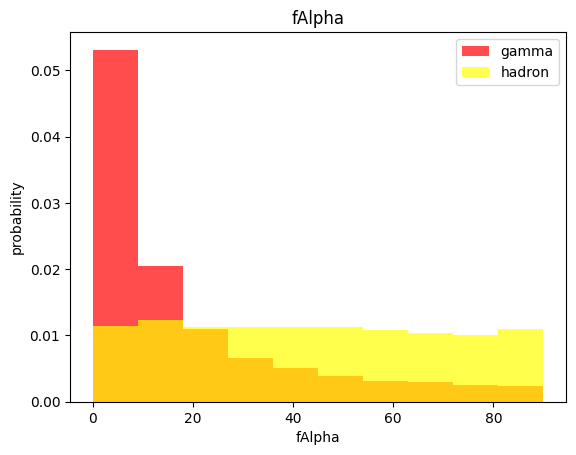

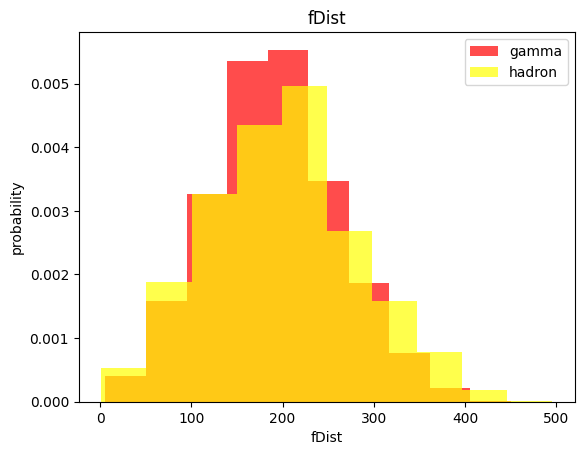

In [5]:
for label in cols[:-1]:
  plt.hist(dp[dp["class"]==1][label],color='red',label='gamma',alpha=0.7,density=True)
  plt.hist(dp[dp["class"]==0][label],color='yellow',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train, validation, test data seta

In [6]:
train,valid,test=np.split(dp.sample(frac=1),[int(0.6*len(dp)),int(0.8*len(dp))])  #frac=1 will shuffle the data, [int(0.6*len(dp)),int(0.8*len(dp))] means 60% to train, btw 60 and 80 to validate and 80 and 100 to test


In [7]:
print(len(train[train['class']==1])) #gamma
print(len(train[train['class']==0]))  #hadron

7387
4025


normalizing all the data in order to make it useable

import StandardScaler

due to significant difference in no. of gamma and hadron we have to oversample our training data set, inc the no. of hadron to match to gamma

import imblearn

In [8]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y) #oversampling take more of the less class and keep sapling to increse the size of dataset

  data=np.hstack((x,np.reshape(y,(-1,1))))  #puts two arrays and horizontally stack them together, since x is 2d array and y is 1d vector for we have to resahpe it in order to stack these two together
  return data,x,y


In [9]:
train,x_train,y_train=scale_dataset(train,oversample=True)

valid,x_valid,y_valid=scale_dataset(valid,oversample=False)

test,x_test,y_test=scale_dataset(test,oversample=False)

#kNN nearest neighbours

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model=KNeighborsClassifier(n_neighbors=5)  #no. of neighbours we want for predictions
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_pred=knn_model.predict(x_test)

In [13]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [14]:

y_test

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1350
           1       0.85      0.87      0.86      2454

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



81% is accuracy for 5 neighbours


#Naive Byes

In [16]:
from sklearn.naive_bayes import GaussianNB


In [17]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)


In [18]:
y_pred=nb_model.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1350
           1       0.73      0.90      0.80      2454

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



accuracy is 73%

#Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)


In [22]:
y_pred=lg_model.predict(x_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1350
           1       0.84      0.82      0.83      2454

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



accuracy is 78%

# SVM (Support Vector Machines)

In [24]:
from sklearn.svm import SVC


In [25]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [26]:
y_pred=svm_model.predict(x_test)

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1350
           1       0.89      0.89      0.89      2454

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Accuracy is 86%

#Neural Net

In [28]:
import tensorflow as tf


In [29]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch') #epoch is no. of training cycles
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


In [30]:
def train_model(x_train,y_train,num_nodes,dropout_prob, learning_rate, batch_size, epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),   #128 neurons in 1st stage
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),                     #128 neurons in 2nd stage
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

  history=nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  #validation_split is 20% data will be left in train dataset to check if it is doing correctly the 100 times we are training the model, 20% is lesft to check if it is going right or not

  #verbose=0 will not allow to print each time when it is training, so that i seems not that much cluttered


  return nn_model,history



nodes :64, dropout:0, lr:0.001, batch size: 32, epochs:100


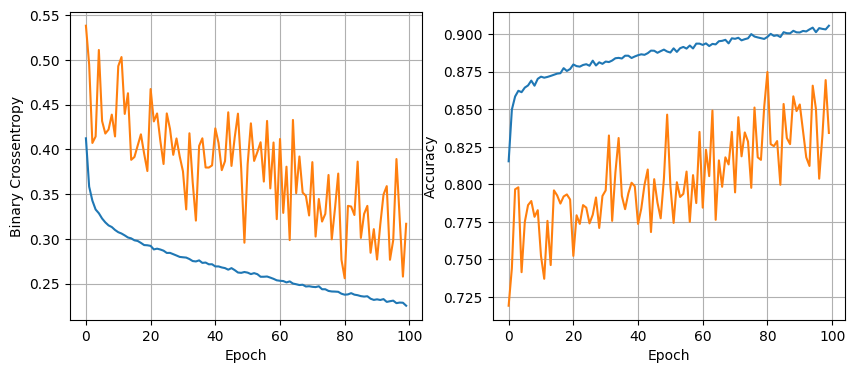

119/119 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8738
nodes :64, dropout:0, lr:0.001, batch size: 64, epochs:100


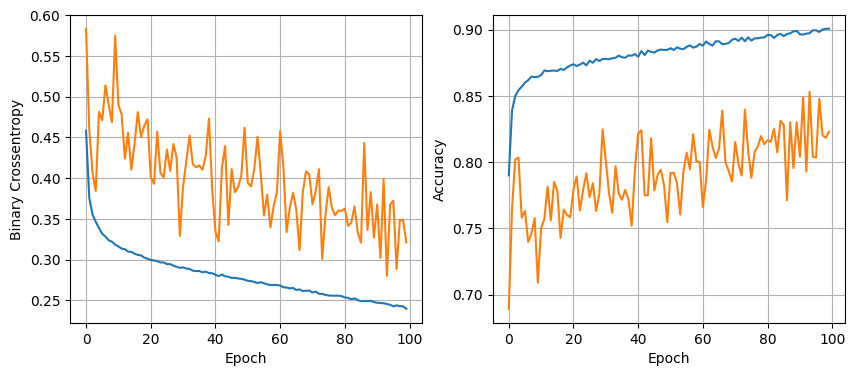

119/119 [==============================] - 0s 2ms/step - loss: 0.3151 - accuracy: 0.8736
nodes :64, dropout:0, lr:0.005, batch size: 32, epochs:100


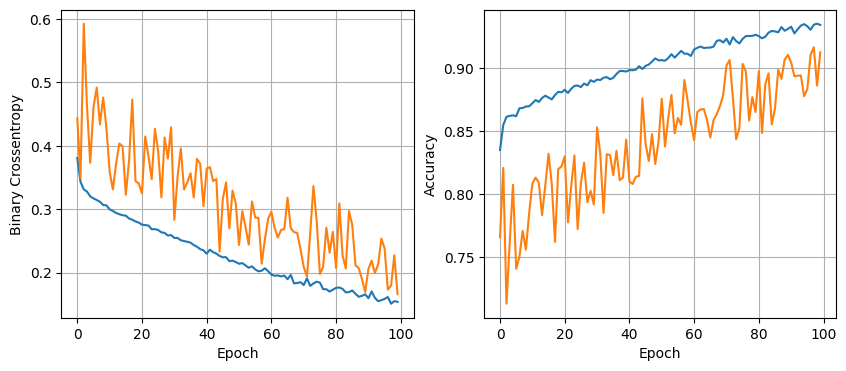

119/119 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.8457
nodes :64, dropout:0, lr:0.005, batch size: 64, epochs:100


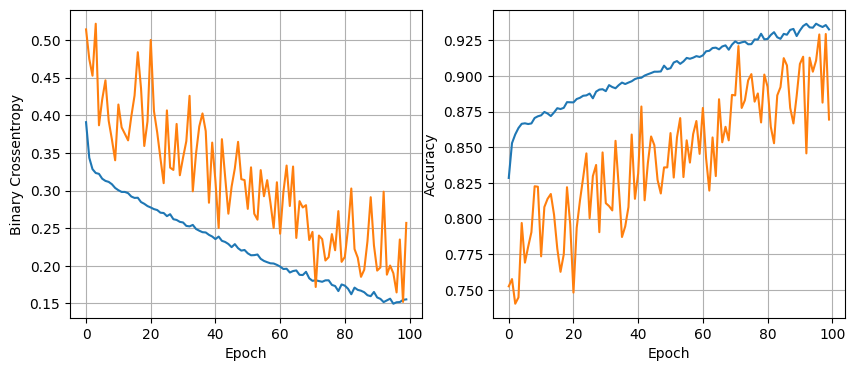

119/119 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.8586
nodes :64, dropout:0.2, lr:0.001, batch size: 32, epochs:100


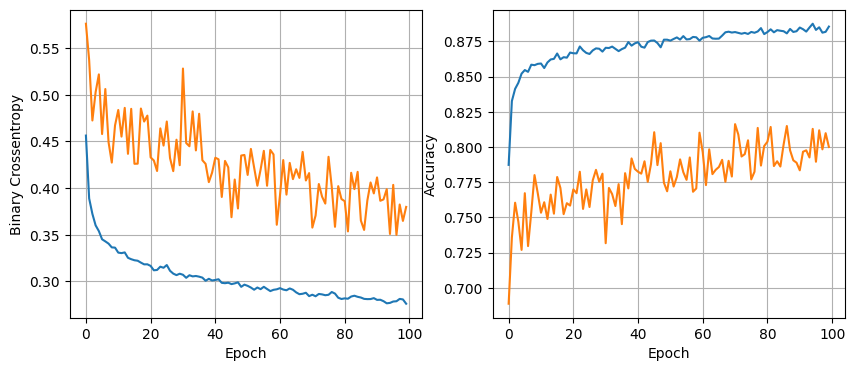

119/119 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8846
nodes :64, dropout:0.2, lr:0.001, batch size: 64, epochs:100


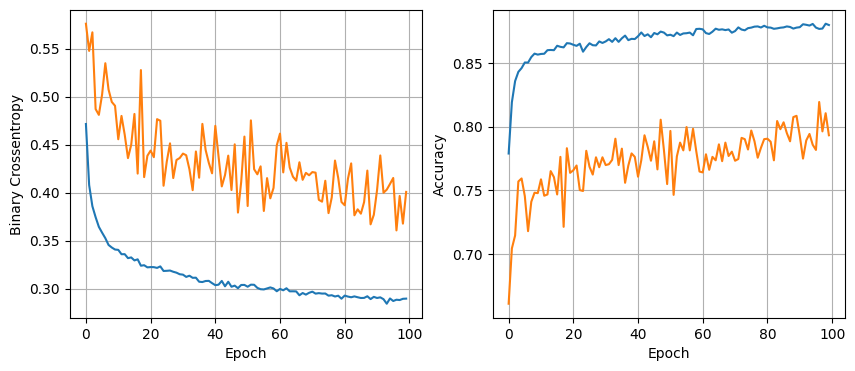

119/119 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8809
nodes :64, dropout:0.2, lr:0.005, batch size: 32, epochs:100


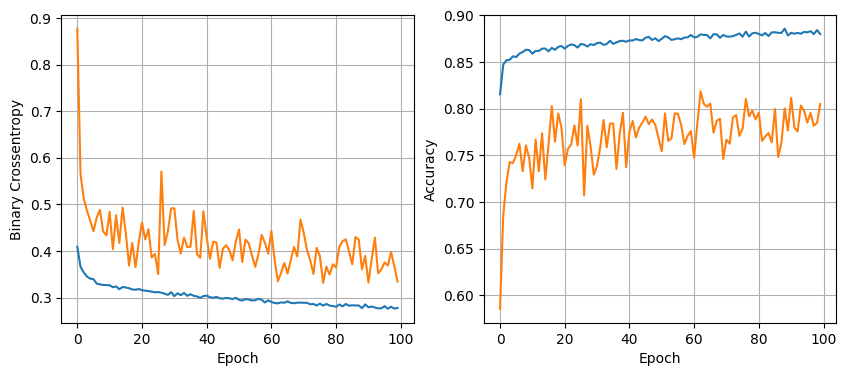

119/119 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8859
nodes :64, dropout:0.2, lr:0.005, batch size: 64, epochs:100


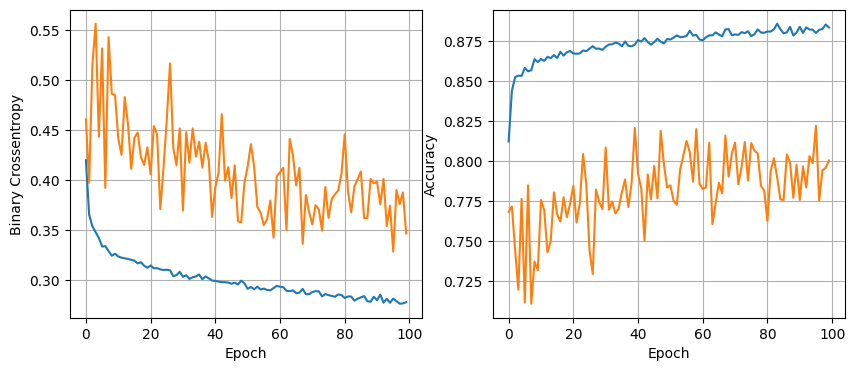

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8841
nodes :128, dropout:0, lr:0.001, batch size: 32, epochs:100


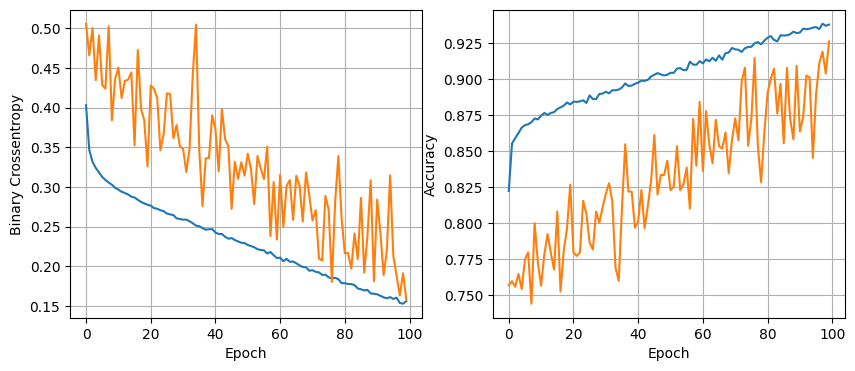

119/119 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8559
nodes :128, dropout:0, lr:0.001, batch size: 64, epochs:100


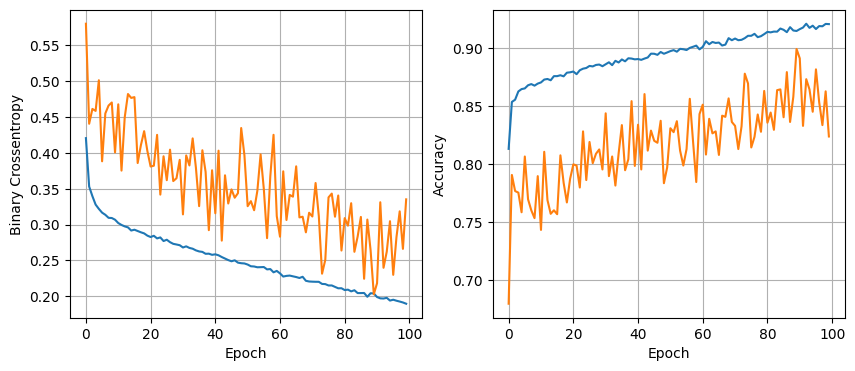

119/119 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8691
nodes :128, dropout:0, lr:0.005, batch size: 32, epochs:100


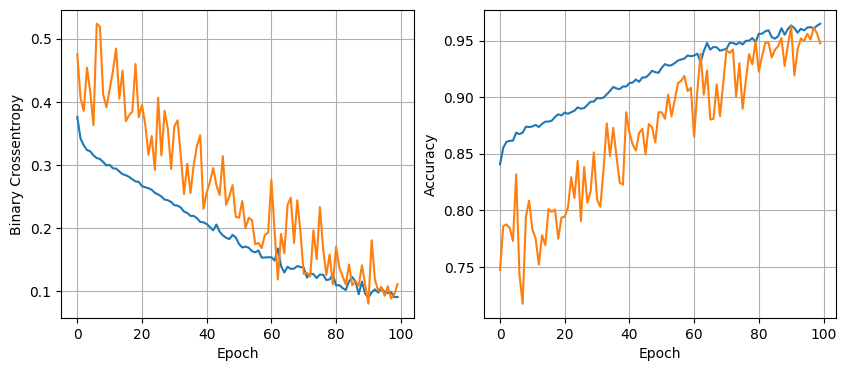

119/119 [==============================] - 0s 2ms/step - loss: 0.9180 - accuracy: 0.8494
nodes :128, dropout:0, lr:0.005, batch size: 64, epochs:100


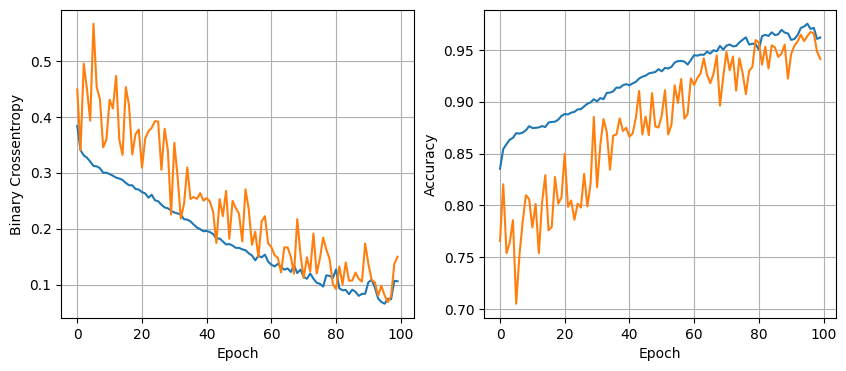

119/119 [==============================] - 0s 2ms/step - loss: 0.8722 - accuracy: 0.8496
nodes :128, dropout:0.2, lr:0.001, batch size: 32, epochs:100


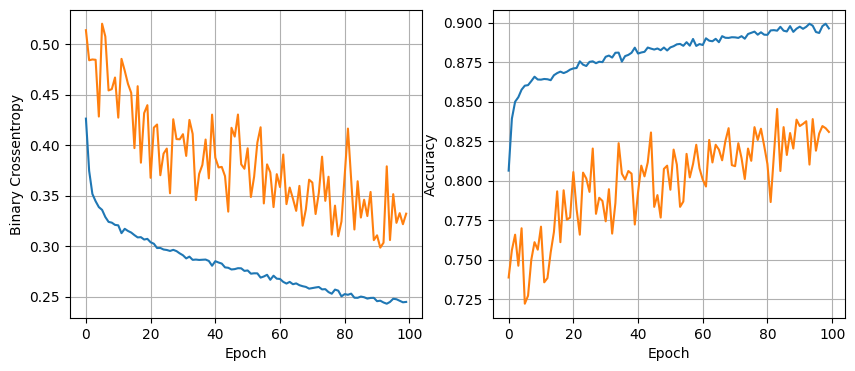

119/119 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8891
nodes :128, dropout:0.2, lr:0.001, batch size: 64, epochs:100


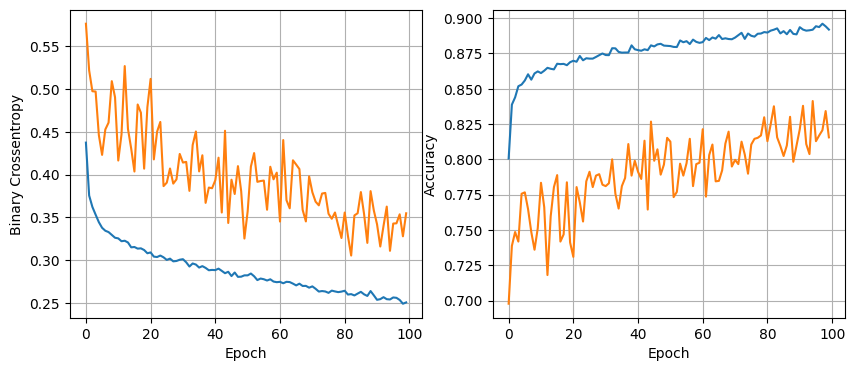

119/119 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8804
nodes :128, dropout:0.2, lr:0.005, batch size: 32, epochs:100


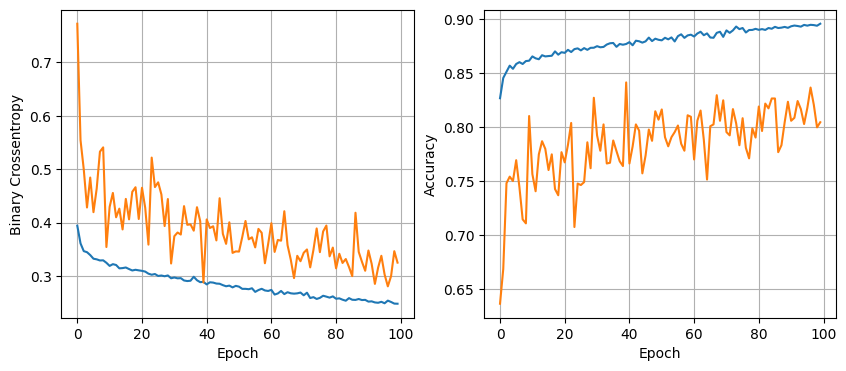

119/119 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8812
nodes :128, dropout:0.2, lr:0.005, batch size: 64, epochs:100


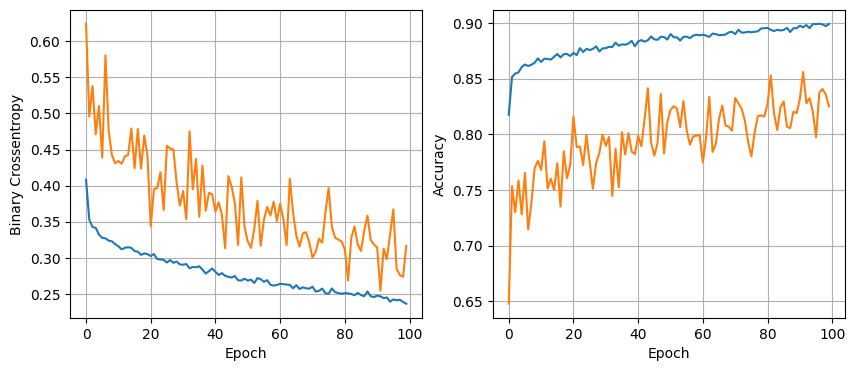

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8785


In [31]:
least_val_loss=float('inf') #setting initial the least validation loss to infinity
least_loss_model=None

epochs=100
for num_nodes in [64, 128]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.001, 0.005]:
      for batch_size in [32, 64]:

        print(f'nodes :{num_nodes}, dropout:{dropout_prob}, lr:{learning_rate}, batch size: {batch_size}, epochs:100')

        model, history= train_model(x_train,y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs)

        plot_history(history)

        val_loss=model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model






In [32]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,) #reshape turn y_pred into into 1-d, astpye converts to 0 and 1
y_pred


119/119 [==============================] - 0s 1ms/step


array([1, 1, 1, ..., 1, 0, 0])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1350
           1       0.88      0.94      0.90      2454

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



accuracy is 87%